In [4]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [5]:
# import data 
unitdata = pd.read_csv("C:\\Users\\oakin\\Documents\\Data Science Udemy\\Python Programming\\Unit Anaytics\\rawdata.csv")

In [6]:
# checking the data attibutes
type(unitdata)

pandas.core.frame.DataFrame

In [7]:
unitdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   hours      24 non-null     object
 1   FY2018/19  24 non-null     int64 
 2   FY2019/20  24 non-null     int64 
 3   FY2020/21  24 non-null     int64 
 4   FY2021/22  24 non-null     int64 
 5   Total      24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB


In [8]:
unitdata.shape

(24, 6)

In [9]:
unitdata.head()

,hours,FY2018/19,FY2019/20,FY2020/21,FY2021/22,Total
0,0:00,4,1,7,5,17
1,1:00,4,4,5,4,17
2,2:00,4,9,3,5,21
3,3:00,2,6,3,1,12
4,4:00,6,5,1,8,20


In [16]:
# there is a need to convert hours column to time data
unitdata['time'] = pd.to_datetime(unitdata['hours'], format = '%H:%M').dt.hour     # this converts the filed to datetime type
# the hours are stored as integers in the field unitdata.time

In [17]:
unitdata.head()

,hours,FY2018/19,FY2019/20,FY2020/21,FY2021/22,Total,time
0,2022-10-14 00:00:00,4,1,7,5,17,0
1,2022-10-14 01:00:00,4,4,5,4,17,1
2,2022-10-14 02:00:00,4,9,3,5,21,2
3,2022-10-14 03:00:00,2,6,3,1,12,3
4,2022-10-14 04:00:00,6,5,1,8,20,4


In [18]:
unitdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   hours      24 non-null     datetime64[ns]
 1   FY2018/19  24 non-null     int64         
 2   FY2019/20  24 non-null     int64         
 3   FY2020/21  24 non-null     int64         
 4   FY2021/22  24 non-null     int64         
 5   Total      24 non-null     int64         
 6   time       24 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 1.4 KB


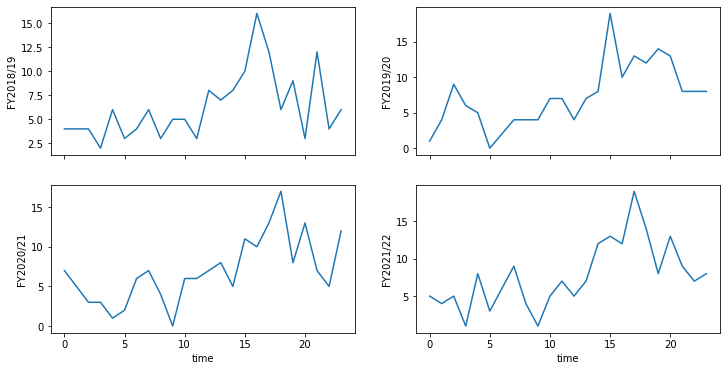

In [36]:
f, axes = plt.subplots(2,2, figsize = (12,6), sharex = True) 
p1 = sns.lineplot(data = unitdata, x='time',y='FY2018/19', ax = axes[0,0])
p2 = sns.lineplot(data = unitdata, x='time',y='FY2019/20', ax = axes[0,1])
p3 = sns.lineplot(data = unitdata, x='time',y='FY2020/21', ax = axes[1,0])
p4 = sns.lineplot(data = unitdata, x='time',y='FY2021/22', ax = axes[1,1])

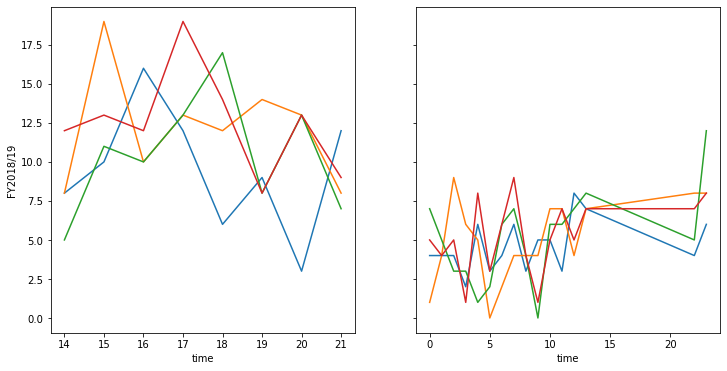

In [133]:
# seprating the plots because it looks like some period have higher outcomes, period 14:00 to 21:00
f, axes = plt.subplots(1,2, figsize = (12,6), sharey = True) 
p1 = sns.lineplot(data = unitdata[(unitdata.time >= 14) & (unitdata.time <= 21)], x='time',y='FY2018/19', ax = axes[0])
p2 = sns.lineplot(data = unitdata[(unitdata.time >= 14) & (unitdata.time <= 21)], x='time',y='FY2019/20', ax = axes[0])
p3 = sns.lineplot(data = unitdata[(unitdata.time >= 14) & (unitdata.time <= 21)], x='time',y='FY2020/21', ax = axes[0])
p4 = sns.lineplot(data = unitdata[(unitdata.time >= 14) & (unitdata.time <= 21)], x='time',y='FY2021/22', ax = axes[0])
p1b = sns.lineplot(data = unitdata[(unitdata.time < 14) | (unitdata.time > 21)], x='time',y='FY2018/19', ax = axes[1])
p2b = sns.lineplot(data = unitdata[(unitdata.time < 14) | (unitdata.time > 21)], x='time',y='FY2019/20', ax = axes[1])
p3b = sns.lineplot(data = unitdata[(unitdata.time < 14) | (unitdata.time > 21)], x='time',y='FY2020/21', ax = axes[1])
p4b = sns.lineplot(data = unitdata[(unitdata.time < 14) | (unitdata.time > 21)], x='time',y='FY2021/22', ax = axes[1])

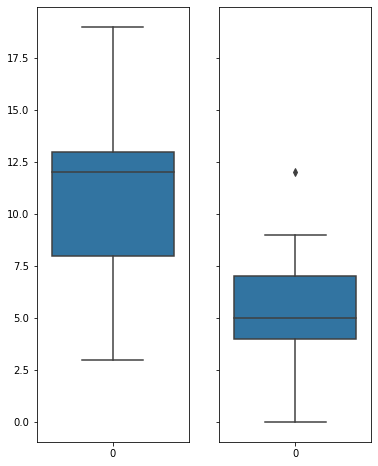

In [236]:
f, axes = plt.subplots(1,2, figsize = (6,8), sharey = True)
PL = sns.boxplot(data = LPeriod, ax = axes[1])
PH = sns.boxplot(data = HPeriod, ax = axes[0])

In [168]:
# from the vissualizations, it seemes there is increase in the tthis variables between 14:00 to 21:00 hrs compared to other
# hours of the day 
# lets separate the two periods 
import warnings
warnings.filterwarnings('ignore')
HPeriod = pd.DataFrame()
LPeriod = pd.DataFrame()
HPeriod = unitdata[(unitdata.time >= 14) & (unitdata.time <= 21)]['FY2018/19']
HPeriod = HPeriod.append(unitdata[(unitdata.time >= 14) & (unitdata.time <= 21)]['FY2019/20'], ignore_index = True)
HPeriod = HPeriod.append(unitdata[(unitdata.time >= 14) & (unitdata.time <= 21)]['FY2020/21'], ignore_index = True)
HPeriod = HPeriod.append(unitdata[(unitdata.time >= 14) & (unitdata.time <= 21)]['FY2021/22'], ignore_index = True)

LPeriod = unitdata[(unitdata.time < 14) | (unitdata.time > 21)]['FY2018/19']
LPeriod = LPeriod.append(unitdata[(unitdata.time < 14) | (unitdata.time > 21)]['FY2019/20'], ignore_index = True)
LPeriod = LPeriod.append(unitdata[(unitdata.time < 14) | (unitdata.time > 21)]['FY2020/21'], ignore_index = True)
LPeriod = LPeriod.append(unitdata[(unitdata.time < 14) | (unitdata.time > 21)]['FY2021/22'], ignore_index = True)



In [237]:
#Hypothesis test
#H-Null : HPeriod Mean = LPeriod Mean
#H-Alt: HPeriod MEan > LPeriod Mean
import scipy.stats as sc

p = sc.ttest_ind(HPeriod,LPeriod)
p
if p[1] <= 0.05:
    print('Reject Null Hypothesis'",p-vlaue=", p[1])
else: 
    print('Accept Null Hypothesis'",p-vlaue=", p[1])




Reject Null Hypothesis,p-vlaue= 5.842681300831692e-16


In [232]:
#------------End of Work------------